In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
# Load dataset 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

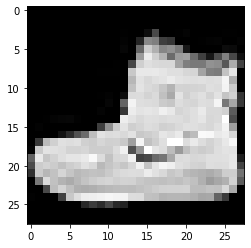

In [4]:
# Visualize a sample image
plt.imshow(X_train[0], cmap = 'gray')

In [5]:
# check out the shape of the training data
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
# check out the shape of the testing data
X_test.shape

(10000, 28, 28)

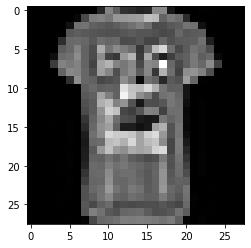

In [9]:
# Let's view some images!
i = random.randint(1, 60000)
plt.imshow(X_train[i], cmap = 'gray')

In [10]:
label = y_train[i]
label


0

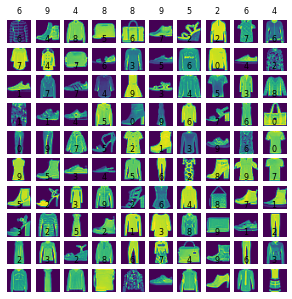

In [11]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (5, 5))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid* L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')



In [12]:
# normalize data
X_train = X_train/255
X_text = X_test/255

In [13]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
# add some noise
noise_factor = 0.3

noise_dataset = []

for img in X_train:
    noisy_image = img + noise_factor * np.random.randn (*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)

In [25]:
noise_dataset = np.array(noise_dataset)

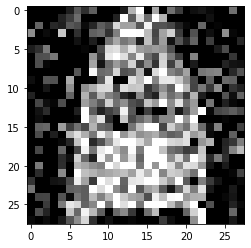

In [24]:
plt.imshow(noise_dataset[22], cmap = 'gray')

In [16]:
noise_factor = 0.3

noise_dataset_test = []

for img in X_test:
    noisy_image = img + noise_factor * np.random.randn (*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset_test.append(noisy_image)

In [26]:
noise_dataset_test = np.array(noise_dataset_test)

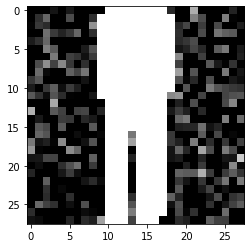

In [17]:
plt.imshow(noise_dataset_test[211], cmap = 'gray')

In [18]:
# add noise to testing dataset

In [21]:
autoencoder = tf.keras.models.Sequential()

autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same',input_shape = (28, 28, 1)))

autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same'))
                
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'same'))  
                
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = 'same'))  
                
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, activation = 'sigmoid', padding = 'same'))               

In [22]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          1168      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        2320      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 4,953
Trainable params: 4,953
Non-trainable params: 0
_________________________________________________________________


In [27]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_dataset_test.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 590us/sample - loss: 0.3864 - val_loss: -236.0734
Epoch 2/10
60000/60000 [==============================] - 32s 531us/sample - loss: 0.3115 - val_loss: -244.3347
Epoch 3/10
60000/60000 [==============================] - 29s 475us/sample - loss: 0.3057 - val_loss: -244.3332
Epoch 4/10
60000/60000 [==============================] - 29s 491us/sample - loss: 0.3032 - val_loss: -253.0994
Epoch 5/10
60000/60000 [==============================] - 29s 490us/sample - loss: 0.3017 - val_loss: -237.0863
Epoch 6/10
60000/60000 [==============================] - 29s 477us/sample - loss: 0.3007 - val_loss: -244.1200
Epoch 7/10
60000/60000 [==============================] - 33s 547us/sample - loss: 0.3001 - val_loss: -238.6191
Epoch 8/10
60000/60000 [==============================] - 29s 479us/sample - loss: 0.2997 - val_loss: -251.8712
Epoch 9/10
60000/60000 [==============================

In [28]:
evaluation = autoencoder.evaluate(noise_dataset_test.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print('Test Accuracy : {:.3f}'.format(evaluation))

10000/10000 [==============================] - 3s 332us/sample - loss: -248.2328
Test Accuracy : -248.233


In [29]:
predicted = autoencoder.predict(noise_dataset_test[:10].reshape(-1, 28, 28, 1))

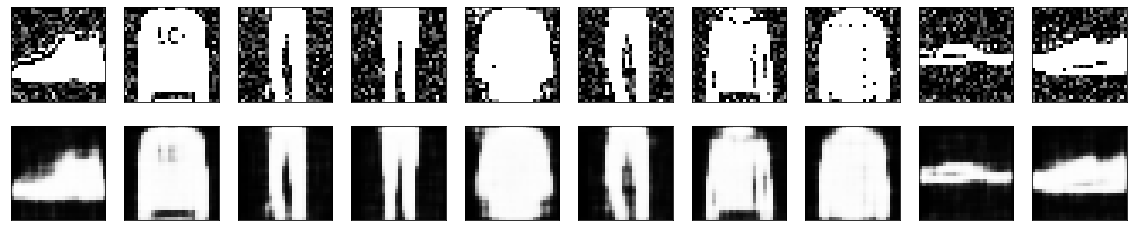

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_dataset_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)